In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 200 # total emission cap
Regulator19 = Regulator("Regulator19", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 100 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator19)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator19)

country3 = Country('GR', size= 0.1, regulator= Regulator19)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 10*x+ 2*x**2 + 0.1*x**3 , 0, 0, 0, regulator= Regulator19)
firm2 = Firm('firm2', 1, 2, x*0, 11*x+ 3*x**2 + 0.2*x**3, 0, 0, 0, regulator= Regulator19)
firm3 = Firm('firm3', 1, 3, x*0, 5*x+ 4*x**2 + 5*x**3 , 0, 0, 0, regulator= Regulator19)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator19)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator19)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator19)

In [3]:
Regulator19.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [4]:
Regulator19.emission_cap = Regulator19.BAU_emissions * 0.8

frees = np.linspace(0, 1, 100)

profits1 = []
profits2 = []
abatements1 = []
abatements2 = []
permits1 = []
permits2 = []
trades1 = []
trades2 = []
revenews1 = []
revenews2 = []
permit_price = []
outputs1 = []
outputs2 = []
emissions1 = []
emissions2 = []


for free in tqdm.tqdm(frees):
    
    
    sector1.free_emission_multiplier = free
    Regulator19.optimization_with_least_squares()
    print(f"{free}: {Regulator19.equilibrium_tester(output = True)}")

    for firm in Regulator19.firm_registry.values():
        firm.calculate_profit_components()

    profits1.append(mean( float(i.profit) for i in sector1.firms))
    profits2.append(mean( float(i.profit) for i in sector2.firms))
    abatements1.append(mean( float(i.abatement) for i in sector1.firms))
    abatements2.append(mean( float(i.abatement) for i in sector2.firms))
    permits1.append(mean( float(i.permits_used) for i in sector1.firms))
    permits2.append(mean( float(i.permits_used) for i in sector2.firms))
    trades1.append(mean( float(i.permits_costs) for i in sector1.firms))
    trades2.append(mean( float(i.permits_costs) for i in sector2.firms))
    revenews1.append( mean(float(i.sales) for i in sector1.firms))
    revenews2.append(mean( float(i.sales) for i in sector2.firms))
    permit_price.append(Regulator19.permit_price)
    outputs1.append(mean(float(i.actual_output) for i in sector1.firms))
    outputs2.append(mean(float(i.actual_output) for i in sector2.firms))
    emissions1.append(mean(float(i.emission) for i in sector1.firms))
    emissions2.append(mean(float(i.emission) for i in sector2.firms))    

  0%|          | 0/100 [00:00<?, ?it/s]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.45e-6 ✔️ |  +8.01e-5 ✔️ |   -5.7698 ✔️ |   -5.9698 ✔️ |   +1.1540 ✔️ | 5/5
0.0: (True, 8.00749298797143e-5)


  2%|▏         | 2/100 [00:12<10:00,  6.12s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.25e-6 ✔️ |  +8.03e-5 ✔️ |   -5.7823 ✔️ |   -5.9823 ✔️ |   +1.1565 ✔️ | 5/5
0.010101010101010102: (True, 8.02579559024963e-5)


  3%|▎         | 3/100 [00:18<09:52,  6.10s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.52e-12 ✔️ | +8.19e-13 ✔️ |   -5.7949 ✔️ |   -5.9949 ✔️ |   +1.1590 ✔️ | 5/5
0.020202020202020204: (True, 1.52056145452661e-12)


  4%|▍         | 4/100 [00:24<09:42,  6.06s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.16e-12 ✔️ | +1.16e-12 ✔️ |   -5.8076 ✔️ |   -6.0076 ✔️ |   +1.1615 ✔️ | 5/5
0.030303030303030304: (True, 1.15996101612836e-12)


  5%|▌         | 5/100 [00:30<09:33,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.56e-12 ✔️ | +1.10e-12 ✔️ |   -5.8204 ✔️ |   -6.0204 ✔️ |   +1.1641 ✔️ | 5/5
0.04040404040404041: (True, 1.55964130499342e-12)


  6%|▌         | 6/100 [00:36<09:28,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +2.04e-12 ✔️ | +1.37e-12 ✔️ |   -5.8333 ✔️ |   -6.0333 ✔️ |   +1.1667 ✔️ | 5/5
0.05050505050505051: (True, 2.03570493795269e-12)


  7%|▋         | 7/100 [00:42<09:20,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.77e-12 ✔️ | +1.28e-12 ✔️ |   -5.8463 ✔️ |   -6.0463 ✔️ |   +1.1693 ✔️ | 5/5
0.06060606060606061: (True, 1.76747505520325e-12)


  8%|▊         | 8/100 [00:48<09:15,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.60e-6 ✔️ |  +8.02e-5 ✔️ |   -5.8594 ✔️ |   -6.0594 ✔️ |   +1.1719 ✔️ | 5/5
0.07070707070707072: (True, 8.01817420921225e-5)
Optimal solution found


  9%|▉         | 9/100 [00:54<09:13,  6.08s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.18e-6 ✔️ |  +8.01e-5 ✔️ |   -5.8727 ✔️ |   -6.0727 ✔️ |   +1.1745 ✔️ | 5/5
0.08080808080808081: (True, 8.01366974556572e-5)


 10%|█         | 10/100 [01:01<09:26,  6.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.59e-7 ✔️ |  +8.01e-5 ✔️ |   -5.8860 ✔️ |   -6.0860 ✔️ |   +1.1772 ✔️ | 5/5
0.09090909090909091: (True, 8.00943376333407e-5)


 11%|█         | 11/100 [01:07<09:13,  6.22s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.94e-6 ✔️ |  +8.01e-5 ✔️ |   -5.8994 ✔️ |   -6.0994 ✔️ |   +1.1799 ✔️ | 5/5
0.10101010101010102: (True, 8.00532482170269e-5)


 12%|█▏        | 12/100 [01:13<09:00,  6.14s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.69e-6 ✔️ |  +7.93e-5 ✔️ |   -5.9130 ✔️ |   -6.1130 ✔️ |   +1.1826 ✔️ | 5/5
0.11111111111111112: (True, 7.92938881311045e-5)


 13%|█▎        | 13/100 [01:19<08:50,  6.10s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.44e-6 ✔️ |  +7.93e-5 ✔️ |   -5.9266 ✔️ |   -6.1266 ✔️ |   +1.1853 ✔️ | 5/5
0.12121212121212122: (True, 7.92570420671268e-5)


 14%|█▍        | 14/100 [01:25<08:40,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.12e-6 ✔️ |  +8.00e-5 ✔️ |   -5.9404 ✔️ |   -6.1404 ✔️ |   +1.1881 ✔️ | 5/5
0.13131313131313133: (True, 7.99502816306585e-5)


 15%|█▌        | 15/100 [01:31<08:32,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.43e-6 ✔️ |  +7.99e-5 ✔️ |   -5.9543 ✔️ |   -6.1543 ✔️ |   +1.1909 ✔️ | 5/5
0.14141414141414144: (True, 7.99206814736664e-5)


 16%|█▌        | 16/100 [01:37<08:25,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.21e-6 ✔️ |  +7.99e-5 ✔️ |   -5.9683 ✔️ |   -6.1683 ✔️ |   +1.1937 ✔️ | 5/5
0.15151515151515152: (True, 7.98962662766911e-5)


 17%|█▋        | 17/100 [01:43<08:19,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +5.42e-12 ✔️ | +4.51e-12 ✔️ |   -5.9824 ✔️ |   -6.1824 ✔️ |   +1.1965 ✔️ | 5/5
0.16161616161616163: (True, 5.41788836017076e-12)


 18%|█▊        | 18/100 [01:49<08:11,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +8.01e-12 ✔️ | +7.10e-12 ✔️ |   -5.9966 ✔️ |   -6.1966 ✔️ |   +1.1993 ✔️ | 5/5
0.17171717171717174: (True, 8.01314570253453e-12)


 19%|█▉        | 19/100 [01:55<08:04,  5.98s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.02e-5 ✔️ |  +7.71e-5 ✔️ |   -6.0110 ✔️ |   -6.2110 ✔️ |   +1.2022 ✔️ | 5/5
0.18181818181818182: (True, 7.71406192932034e-5)


 20%|██        | 20/100 [02:01<07:59,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +2.76e-12 ✔️ | +2.37e-12 ✔️ |   -6.0255 ✔️ |   -6.2255 ✔️ |   +1.2051 ✔️ | 5/5
0.19191919191919193: (True, 2.75690581474919e-12)


 21%|██        | 21/100 [02:07<07:56,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +3.80e-12 ✔️ | +3.80e-12 ✔️ |   -6.0401 ✔️ |   -6.2401 ✔️ |   +1.2080 ✔️ | 5/5
0.20202020202020204: (True, 3.80140363631654e-12)


 22%|██▏       | 22/100 [02:13<07:50,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.28e-12 ✔️ | +5.38e-13 ✔️ |   -6.0548 ✔️ |   -6.2548 ✔️ |   +1.2110 ✔️ | 5/5
0.21212121212121213: (True, 1.27542421068938e-12)


 23%|██▎       | 23/100 [02:19<07:44,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.72e-12 ✔️ | +8.08e-13 ✔️ |   -6.0696 ✔️ |   -6.2696 ✔️ |   +1.2139 ✔️ | 5/5
0.22222222222222224: (True, 1.71773706370004e-12)


 24%|██▍       | 24/100 [02:25<07:40,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.76e-12 ✔️ | +1.31e-12 ✔️ |   -6.0846 ✔️ |   -6.2846 ✔️ |   +1.2169 ✔️ | 5/5
0.23232323232323235: (True, 1.76392234152445e-12)


 25%|██▌       | 25/100 [02:31<07:36,  6.09s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.48e-12 ✔️ | +1.48e-12 ✔️ |   -6.0997 ✔️ |   -6.2997 ✔️ |   +1.2199 ✔️ | 5/5
0.24242424242424243: (True, 1.48325796089921e-12)


 26%|██▌       | 26/100 [02:37<07:31,  6.10s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +2.81e-12 ✔️ | +1.90e-12 ✔️ |   -6.1150 ✔️ |   -6.3150 ✔️ |   +1.2230 ✔️ | 5/5
0.25252525252525254: (True, 2.81019651993120e-12)


 27%|██▋       | 27/100 [02:44<07:27,  6.13s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.27e-12 ✔️ | +1.45e-12 ✔️ |   -6.1303 ✔️ |   -6.3303 ✔️ |   +1.2261 ✔️ | 5/5
0.26262626262626265: (True, 1.45128353779000e-12)


 28%|██▊       | 28/100 [02:50<07:29,  6.25s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.68e-12 ✔️ | +1.23e-12 ✔️ |   -6.1459 ✔️ |   -6.3459 ✔️ |   +1.2292 ✔️ | 5/5
0.27272727272727276: (True, 1.68398628375144e-12)


 29%|██▉       | 29/100 [02:57<07:33,  6.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.73e-12 ✔️ | +1.51e-12 ✔️ |   -6.1615 ✔️ |   -6.3615 ✔️ |   +1.2323 ✔️ | 5/5
0.2828282828282829: (True, 1.73372427525464e-12)


 30%|███       | 30/100 [03:03<07:28,  6.40s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.36e-12 ✔️ | +1.36e-12 ✔️ |   -6.1773 ✔️ |   -6.3773 ✔️ |   +1.2355 ✔️ | 5/5
0.29292929292929293: (True, 1.35891298214119e-12)


 31%|███       | 31/100 [03:10<07:19,  6.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +3.54e-12 ✔️ | +3.09e-12 ✔️ |   -6.1932 ✔️ |   -6.3932 ✔️ |   +1.2386 ✔️ | 5/5
0.30303030303030304: (True, 3.54383189460350e-12)


 32%|███▏      | 32/100 [03:16<07:09,  6.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +3.00e-12 ✔️ | +2.09e-12 ✔️ |   -6.2093 ✔️ |   -6.4093 ✔️ |   +1.2419 ✔️ | 5/5
0.31313131313131315: (True, 2.99671398806822e-12)


 33%|███▎      | 33/100 [03:22<07:11,  6.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +5.15e-12 ✔️ | +4.24e-12 ✔️ |   -6.2255 ✔️ |   -6.4255 ✔️ |   +1.2451 ✔️ | 5/5
0.32323232323232326: (True, 5.14788212058193e-12)


 34%|███▍      | 34/100 [03:29<07:04,  6.43s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.02e-6 ✔️ |  +3.02e-6 ✔️ |   -6.2419 ✔️ |   -6.4419 ✔️ |   +1.2484 ✔️ | 5/5
0.33333333333333337: (True, 3.02123355844230e-6)


 35%|███▌      | 35/100 [03:35<06:57,  6.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.35e-6 ✔️ |  +4.35e-6 ✔️ |   -6.2585 ✔️ |   -6.4585 ✔️ |   +1.2517 ✔️ | 5/5
0.3434343434343435: (True, 4.35070740856247e-6)


 36%|███▌      | 36/100 [03:41<06:44,  6.33s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +5.18e-12 ✔️ | +4.27e-12 ✔️ |   -6.2751 ✔️ |   -6.4751 ✔️ |   +1.2550 ✔️ | 5/5
0.3535353535353536: (True, 5.17808018685173e-12)


 37%|███▋      | 37/100 [03:47<06:32,  6.22s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.48e-6 ✔️ |  +1.48e-6 ✔️ |   -6.2920 ✔️ |   -6.4920 ✔️ |   +1.2584 ✔️ | 5/5
0.36363636363636365: (True, 1.48076304640199e-6)


 38%|███▊      | 38/100 [03:53<06:22,  6.16s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.33e-6 ✔️ |  +8.04e-5 ✔️ |   -6.3090 ✔️ |   -6.5090 ✔️ |   +1.2618 ✔️ | 5/5
0.37373737373737376: (True, 8.03762465277913e-5)


 39%|███▉      | 39/100 [03:59<06:10,  6.08s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.30e-6 ✔️ |  +8.04e-5 ✔️ |   -6.3261 ✔️ |   -6.5261 ✔️ |   +1.2652 ✔️ | 5/5
0.38383838383838387: (True, 8.03772980937367e-5)


 40%|████      | 40/100 [04:05<06:05,  6.10s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.52e-6 ✔️ |  +8.04e-5 ✔️ |   -6.3434 ✔️ |   -6.5434 ✔️ |   +1.2687 ✔️ | 5/5
0.393939393939394: (True, 8.03788193302069e-5)


 41%|████      | 41/100 [04:11<05:58,  6.08s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +2.66e-12 ✔️ | +1.20e-12 ✔️ |   -6.3609 ✔️ |   -6.5609 ✔️ |   +1.2722 ✔️ | 5/5
0.4040404040404041: (True, 2.66098254542158e-12)


 42%|████▏     | 42/100 [04:17<05:48,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.67e-12 ✔️ | +2.58e-12 ✔️ |   -6.3786 ✔️ |   -6.5786 ✔️ |   +1.2757 ✔️ | 5/5
0.4141414141414142: (True, 2.57571741713036e-12)


 43%|████▎     | 43/100 [04:23<05:40,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +8.85e-13 ✔️ | +8.85e-13 ✔️ |   -6.3964 ✔️ |   -6.5964 ✔️ |   +1.2793 ✔️ | 5/5
0.42424242424242425: (True, 8.84625706021325e-13)


 44%|████▍     | 44/100 [04:29<05:37,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +2.58e-12 ✔️ | +2.06e-12 ✔️ |   -6.4144 ✔️ |   -6.6144 ✔️ |   +1.2829 ✔️ | 5/5
0.43434343434343436: (True, 2.58459920132736e-12)


 45%|████▌     | 45/100 [04:35<05:28,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +2.03e-12 ✔️ | +2.49e-12 ✔️ |   -6.4326 ✔️ |   -6.6326 ✔️ |   +1.2865 ✔️ | 5/5
0.4444444444444445: (True, 2.48512321832095e-12)


 46%|████▌     | 46/100 [04:41<05:20,  5.94s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +9.75e-7 ✔️ |  +8.04e-5 ✔️ |   -6.4509 ✔️ |   -6.6509 ✔️ |   +1.2902 ✔️ | 5/5
0.4545454545454546: (True, 8.04086436634321e-5)


 47%|████▋     | 47/100 [04:47<05:11,  5.89s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +6.75e-12 ✔️ | +5.84e-12 ✔️ |   -6.4695 ✔️ |   -6.6695 ✔️ |   +1.2939 ✔️ | 5/5
0.4646464646464647: (True, 6.75193234656035e-12)


 48%|████▊     | 48/100 [04:53<05:05,  5.87s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +9.06e-7 ✔️ |  +8.04e-5 ✔️ |   -6.4882 ✔️ |   -6.6882 ✔️ |   +1.2976 ✔️ | 5/5
0.4747474747474748: (True, 8.04277798600594e-5)


 49%|████▉     | 49/100 [04:58<04:59,  5.86s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.70e-7 ✔️ |  +8.04e-5 ✔️ |   -6.5071 ✔️ |   -6.7071 ✔️ |   +1.3014 ✔️ | 5/5
0.48484848484848486: (True, 8.04229923936362e-5)


 50%|█████     | 50/100 [05:04<04:55,  5.91s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.29e-7 ✔️ |  +8.04e-5 ✔️ |   -6.5262 ✔️ |   -6.7262 ✔️ |   +1.3052 ✔️ | 5/5
0.494949494949495: (True, 8.04168014276740e-5)


 51%|█████     | 51/100 [05:11<04:53,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.72e-7 ✔️ |  +8.04e-5 ✔️ |   -6.5455 ✔️ |   -6.7455 ✔️ |   +1.3091 ✔️ | 5/5
0.5050505050505051: (True, 8.04126443121334e-5)


 52%|█████▏    | 52/100 [05:17<04:47,  5.98s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.49e-12 ✔️ | +2.04e-12 ✔️ |   -6.5650 ✔️ |   -6.7650 ✔️ |   +1.3130 ✔️ | 5/5
0.5151515151515152: (True, 2.04103400847089e-12)


 53%|█████▎    | 53/100 [05:23<04:40,  5.96s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.81e-7 ✔️ |  +8.04e-5 ✔️ |   -6.5847 ✔️ |   -6.7847 ✔️ |   +1.3169 ✔️ | 5/5
0.5252525252525253: (True, 8.04013284785299e-5)


 54%|█████▍    | 54/100 [05:28<04:33,  5.95s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.31e-6 ✔️ |  +8.04e-5 ✔️ |   -6.6046 ✔️ |   -6.8046 ✔️ |   +1.3209 ✔️ | 5/5
0.5353535353535354: (True, 8.03960383599645e-5)


 55%|█████▌    | 55/100 [05:34<04:27,  5.95s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.20e-7 ✔️ |  +8.04e-5 ✔️ |   -6.6247 ✔️ |   -6.8247 ✔️ |   +1.3249 ✔️ | 5/5
0.5454545454545455: (True, 8.03900264187973e-5)


 56%|█████▌    | 56/100 [05:41<04:26,  6.06s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.71e-6 ✔️ |  +8.01e-5 ✔️ |   -6.6451 ✔️ |   -6.8451 ✔️ |   +1.3290 ✔️ | 5/5
0.5555555555555556: (True, 8.00776182394713e-5)


 57%|█████▋    | 57/100 [05:47<04:20,  6.06s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.28e-5 ✔️ |  +8.02e-5 ✔️ |   -6.6656 ✔️ |   -6.8656 ✔️ |   +1.3331 ✔️ | 5/5
0.5656565656565657: (True, 8.01509440897519e-5)


 58%|█████▊    | 58/100 [05:53<04:12,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.49e-6 ✔️ |  +7.99e-5 ✔️ |   -6.6863 ✔️ |   -6.8863 ✔️ |   +1.3373 ✔️ | 5/5
0.5757575757575758: (True, 7.99143727903129e-5)


 59%|█████▉    | 59/100 [05:59<04:06,  6.01s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.67e-6 ✔️ |  +8.00e-5 ✔️ |   -6.7073 ✔️ |   -6.9073 ✔️ |   +1.3415 ✔️ | 5/5
0.5858585858585859: (True, 7.99707176195597e-5)


 60%|██████    | 60/100 [06:05<03:58,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.37e-6 ✔️ |  +8.02e-5 ✔️ |   -6.7285 ✔️ |   -6.9285 ✔️ |   +1.3457 ✔️ | 5/5
0.595959595959596: (True, 8.02252536651338e-5)


 61%|██████    | 61/100 [06:11<03:55,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.37e-6 ✔️ |  +8.01e-5 ✔️ |   -6.7500 ✔️ |   -6.9500 ✔️ |   +1.3500 ✔️ | 5/5
0.6060606060606061: (True, 8.00807940954940e-5)


 62%|██████▏   | 62/100 [06:17<03:48,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.32e-6 ✔️ |  +8.04e-5 ✔️ |   -6.7717 ✔️ |   -6.9717 ✔️ |   +1.3543 ✔️ | 5/5
0.6161616161616162: (True, 8.03818752537211e-5)


 63%|██████▎   | 63/100 [06:23<03:41,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.30e-6 ✔️ |  +8.03e-5 ✔️ |   -6.7936 ✔️ |   -6.9936 ✔️ |   +1.3587 ✔️ | 5/5
0.6262626262626263: (True, 8.03000219491423e-5)


 64%|██████▍   | 64/100 [06:29<03:36,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.23e-6 ✔️ |  +8.03e-5 ✔️ |   -6.8157 ✔️ |   -7.0157 ✔️ |   +1.3631 ✔️ | 5/5
0.6363636363636365: (True, 8.02979099212564e-5)


 65%|██████▌   | 65/100 [06:35<03:30,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.24e-6 ✔️ |  +8.02e-5 ✔️ |   -6.8381 ✔️ |   -7.0381 ✔️ |   +1.3676 ✔️ | 5/5
0.6464646464646465: (True, 8.01655116884348e-5)


 66%|██████▌   | 66/100 [06:41<03:25,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.14e-6 ✔️ |  +8.03e-5 ✔️ |   -6.8608 ✔️ |   -7.0608 ✔️ |   +1.3722 ✔️ | 5/5
0.6565656565656566: (True, 8.02908118124890e-5)


 67%|██████▋   | 67/100 [06:47<03:18,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.19e-6 ✔️ |  +8.00e-5 ✔️ |   -6.8837 ✔️ |   -7.0837 ✔️ |   +1.3767 ✔️ | 5/5
0.6666666666666667: (True, 8.00383230128432e-5)


 68%|██████▊   | 68/100 [06:53<03:11,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.15e-6 ✔️ |  +8.00e-5 ✔️ |   -6.9069 ✔️ |   -7.1069 ✔️ |   +1.3814 ✔️ | 5/5
0.6767676767676768: (True, 7.99694166087050e-5)


 69%|██████▉   | 69/100 [06:59<03:05,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.12e-6 ✔️ |  +7.99e-5 ✔️ |   -6.9303 ✔️ |   -7.1303 ✔️ |   +1.3861 ✔️ | 5/5
0.686868686868687: (True, 7.99097019523742e-5)


 70%|███████   | 70/100 [07:05<03:01,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.13e-6 ✔️ |  +8.00e-5 ✔️ |   -6.9541 ✔️ |   -7.1541 ✔️ |   +1.3908 ✔️ | 5/5
0.696969696969697: (True, 8.00108720540038e-5)


 71%|███████   | 71/100 [07:11<02:55,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.83e-6 ✔️ |  +7.99e-5 ✔️ |   -6.9781 ✔️ |   -7.1781 ✔️ |   +1.3956 ✔️ | 5/5
0.7070707070707072: (True, 7.98718492163175e-5)


 72%|███████▏  | 72/100 [07:17<02:48,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.02e-6 ✔️ |  +7.97e-5 ✔️ |   -7.0023 ✔️ |   -7.2023 ✔️ |   +1.4005 ✔️ | 5/5
0.7171717171717172: (True, 7.96963084184199e-5)


 73%|███████▎  | 73/100 [07:23<02:43,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.06e-6 ✔️ |  +7.97e-5 ✔️ |   -7.0269 ✔️ |   -7.2269 ✔️ |   +1.4054 ✔️ | 5/5
0.7272727272727273: (True, 7.96979698343137e-5)


 74%|███████▍  | 74/100 [07:29<02:36,  6.01s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.05e-6 ✔️ |  +8.03e-5 ✔️ |   -7.0518 ✔️ |   -7.2518 ✔️ |   +1.4104 ✔️ | 5/5
0.7373737373737375: (True, 8.02988875427957e-5)


 75%|███████▌  | 75/100 [07:35<02:32,  6.12s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.13e-6 ✔️ |  +7.98e-5 ✔️ |   -7.0770 ✔️ |   -7.2770 ✔️ |   +1.4154 ✔️ | 5/5
0.7474747474747475: (True, 7.97745534164562e-5)


 76%|███████▌  | 76/100 [07:41<02:25,  6.08s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.48e-6 ✔️ |  +7.94e-5 ✔️ |   -7.1024 ✔️ |   -7.3024 ✔️ |   +1.4205 ✔️ | 5/5
0.7575757575757577: (True, 7.94283518139594e-5)


 77%|███████▋  | 77/100 [07:47<02:18,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.03e-6 ✔️ |  +7.94e-5 ✔️ |   -7.1282 ✔️ |   -7.3282 ✔️ |   +1.4256 ✔️ | 5/5
0.7676767676767677: (True, 7.93945368684490e-5)


 78%|███████▊  | 78/100 [07:53<02:14,  6.10s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.21e-6 ✔️ |  +7.99e-5 ✔️ |   -7.1543 ✔️ |   -7.3543 ✔️ |   +1.4309 ✔️ | 5/5
0.7777777777777778: (True, 7.99007811629338e-5)


 79%|███████▉  | 79/100 [07:59<02:06,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.23e-6 ✔️ |  +7.94e-5 ✔️ |   -7.1808 ✔️ |   -7.3808 ✔️ |   +1.4362 ✔️ | 5/5
0.787878787878788: (True, 7.94233900798247e-5)


 80%|████████  | 80/100 [08:05<01:59,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.20e-6 ✔️ |  +7.94e-5 ✔️ |   -7.2075 ✔️ |   -7.4075 ✔️ |   +1.4415 ✔️ | 5/5
0.797979797979798: (True, 7.94197502678173e-5)


 81%|████████  | 81/100 [08:11<01:52,  5.95s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.24e-6 ✔️ |  +7.94e-5 ✔️ |   -7.2346 ✔️ |   -7.4346 ✔️ |   +1.4469 ✔️ | 5/5
0.8080808080808082: (True, 7.93762953499311e-5)


 82%|████████▏ | 82/100 [08:17<01:46,  5.92s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.64e-6 ✔️ |  +8.50e-5 ✔️ |   -7.2621 ✔️ |   -7.4621 ✔️ |   +1.4524 ✔️ | 5/5
0.8181818181818182: (True, 8.50148815736418e-5)


 83%|████████▎ | 83/100 [08:23<01:40,  5.89s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.56e-6 ✔️ |  +8.49e-5 ✔️ |   -7.2899 ✔️ |   -7.4899 ✔️ |   +1.4580 ✔️ | 5/5
0.8282828282828284: (True, 8.49381613470257e-5)


 84%|████████▍ | 84/100 [08:29<01:35,  5.94s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.36e-6 ✔️ |  +8.47e-5 ✔️ |   -7.3180 ✔️ |   -7.5180 ✔️ |   +1.4636 ✔️ | 5/5
0.8383838383838385: (True, 8.47382332729296e-5)


 85%|████████▌ | 85/100 [08:35<01:28,  5.92s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.89e-7 ✔️ |  +8.03e-5 ✔️ |   -7.3466 ✔️ |   -7.5466 ✔️ |   +1.4693 ✔️ | 5/5
0.8484848484848485: (True, 8.03182396005298e-5)


 86%|████████▌ | 86/100 [08:41<01:22,  5.92s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.30e-7 ✔️ |  +8.04e-5 ✔️ |   -7.3755 ✔️ |   -7.5755 ✔️ |   +1.4751 ✔️ | 5/5
0.8585858585858587: (True, 8.03790566159535e-5)


 87%|████████▋ | 87/100 [08:46<01:16,  5.89s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.08e-6 ✔️ |  +8.03e-5 ✔️ |   -7.4048 ✔️ |   -7.6048 ✔️ |   +1.4810 ✔️ | 5/5
0.8686868686868687: (True, 8.03362766141902e-5)


 88%|████████▊ | 88/100 [08:52<01:10,  5.88s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.15e-6 ✔️ |  +8.04e-5 ✔️ |   -7.4345 ✔️ |   -7.6345 ✔️ |   +1.4869 ✔️ | 5/5
0.8787878787878789: (True, 8.04343734799318e-5)


 89%|████████▉ | 89/100 [08:58<01:04,  5.89s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.70e-6 ✔️ |  +8.04e-5 ✔️ |   -7.4646 ✔️ |   -7.6646 ✔️ |   +1.4929 ✔️ | 5/5
0.888888888888889: (True, 8.03792387813473e-5)


 90%|█████████ | 90/100 [09:04<00:58,  5.90s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.10e-6 ✔️ |  +8.04e-5 ✔️ |   -7.4951 ✔️ |   -7.6951 ✔️ |   +1.4990 ✔️ | 5/5
0.8989898989898991: (True, 8.03775464994771e-5)


 91%|█████████ | 91/100 [09:10<00:53,  5.90s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.84e-6 ✔️ |  +8.04e-5 ✔️ |   -7.5260 ✔️ |   -7.7260 ✔️ |   +1.5052 ✔️ | 5/5
0.9090909090909092: (True, 8.03863290173013e-5)


 92%|█████████▏| 92/100 [09:16<00:46,  5.87s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.37e-12 ✔️ | +1.37e-12 ✔️ |   -7.5574 ✔️ |   -7.7574 ✔️ |   +1.5115 ✔️ | 5/5
0.9191919191919192: (True, 1.36779476633819e-12)


 93%|█████████▎| 93/100 [09:22<00:40,  5.85s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.24e-6 ✔️ |  +8.04e-5 ✔️ |   -7.5891 ✔️ |   -7.7891 ✔️ |   +1.5178 ✔️ | 5/5
0.9292929292929294: (True, 8.03834477736132e-5)


 94%|█████████▍| 94/100 [09:27<00:35,  5.85s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.42e-6 ✔️ |  +8.04e-5 ✔️ |   -7.6214 ✔️ |   -7.8214 ✔️ |   +1.5243 ✔️ | 5/5
0.9393939393939394: (True, 8.04055569076922e-5)


 95%|█████████▌| 95/100 [09:33<00:29,  5.88s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.41e-6 ✔️ |  +8.04e-5 ✔️ |   -7.6541 ✔️ |   -7.8541 ✔️ |   +1.5308 ✔️ | 5/5
0.9494949494949496: (True, 8.04103392475497e-5)


 96%|█████████▌| 96/100 [09:39<00:23,  5.88s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.42e-6 ✔️ |  +8.04e-5 ✔️ |   -7.6873 ✔️ |   -7.8873 ✔️ |   +1.5375 ✔️ | 5/5
0.9595959595959597: (True, 8.04093944033468e-5)


 97%|█████████▋| 97/100 [09:45<00:17,  5.86s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.26e-6 ✔️ |  +8.04e-5 ✔️ |   -7.7210 ✔️ |   -7.9210 ✔️ |   +1.5442 ✔️ | 5/5
0.9696969696969697: (True, 8.04200574116010e-5)


 98%|█████████▊| 98/100 [09:51<00:11,  5.85s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.39e-6 ✔️ |  +8.04e-5 ✔️ |   -7.7551 ✔️ |   -7.9551 ✔️ |   +1.5510 ✔️ | 5/5
0.9797979797979799: (True, 8.03959814525967e-5)


 99%|█████████▉| 99/100 [09:57<00:05,  5.85s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.67e-6 ✔️ |  +8.90e-5 ✔️ |   -7.7898 ✔️ |   -7.9898 ✔️ |   +1.5580 ✔️ | 5/5
0.98989898989899: (True, 8.90446336150319e-5)


100%|██████████| 100/100 [10:03<00:00,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      | +1.95e-11 ✔️ | +1.95e-11 ✔️ |   -7.8250 ✔️ |   -8.0250 ✔️ |   +1.5650 ✔️ | 5/5
1.0: (True, 1.95363725197240e-11)


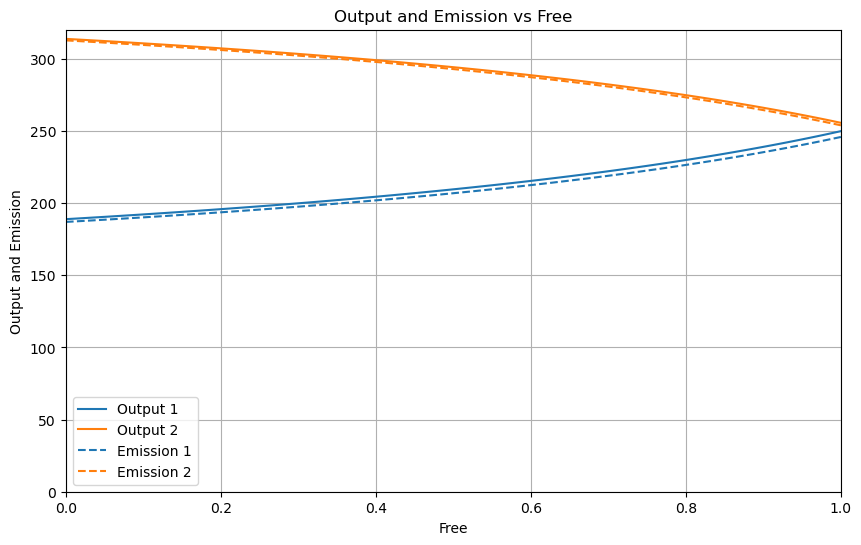

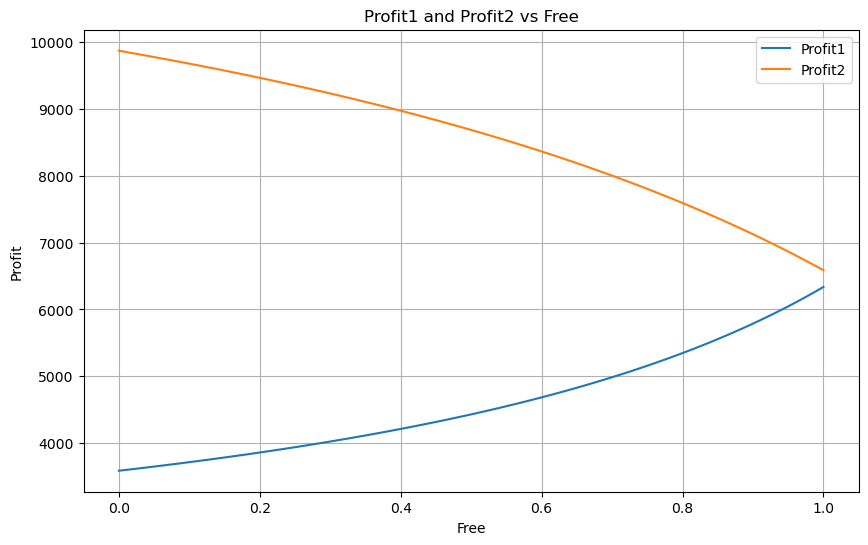

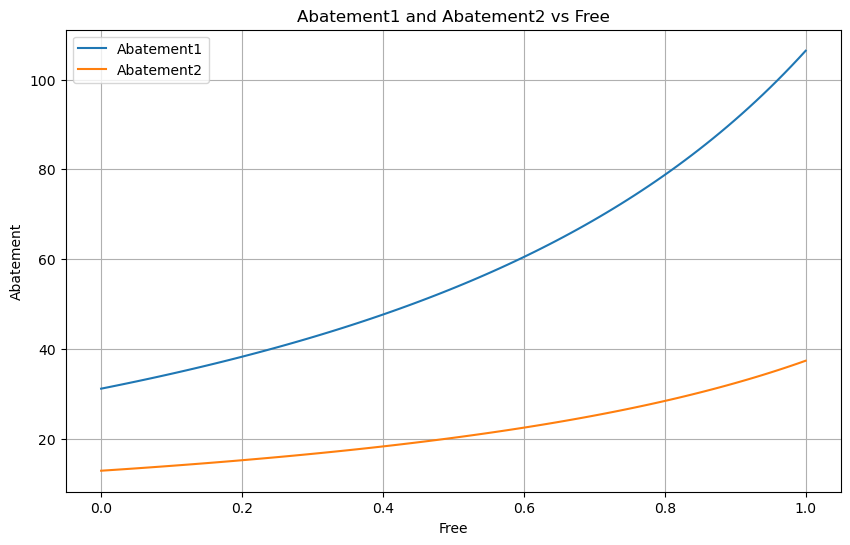

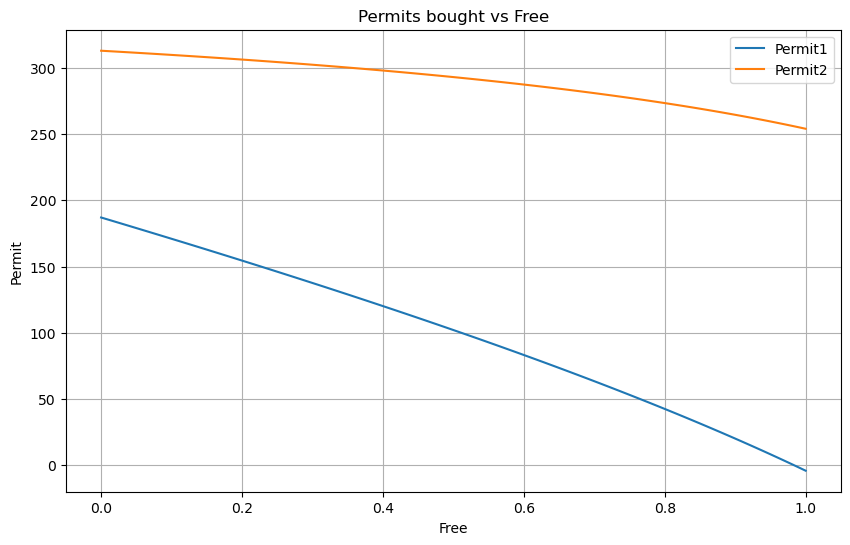

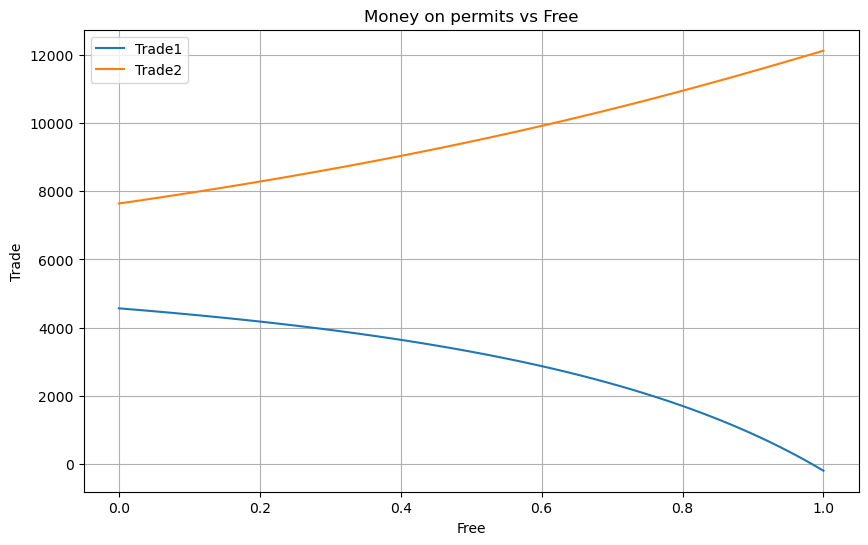

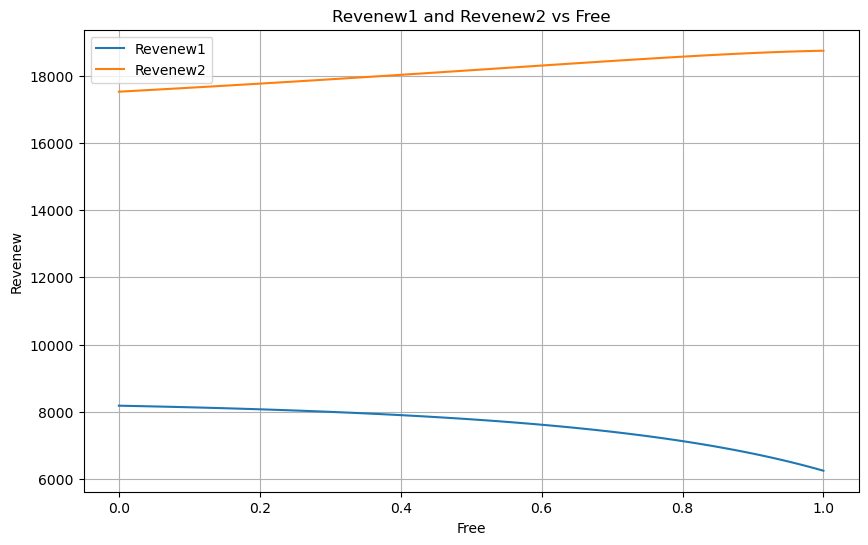

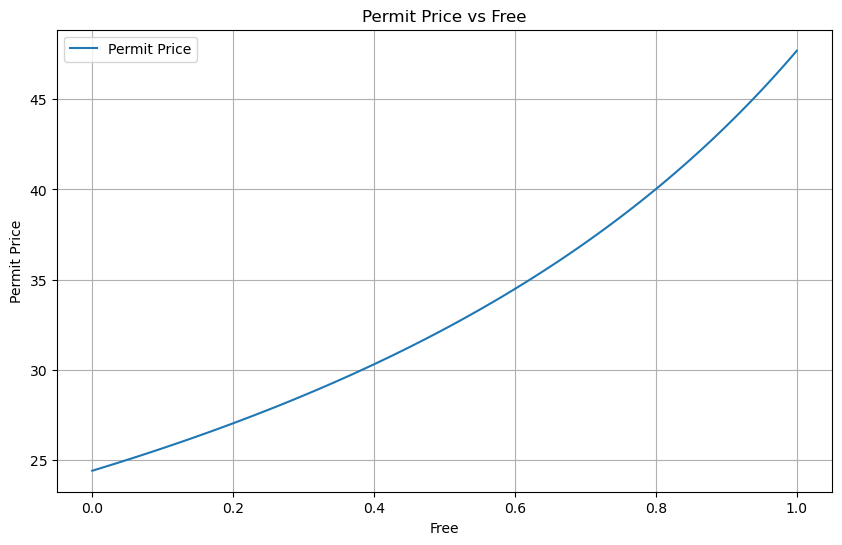

In [6]:
# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, outputs1, label='Output 1', color = '#1f77b4')
plt.plot(frees, outputs2, label='Output 2', color = '#ff7f0e')
plt.plot(frees, emissions1, label='Emission 1', linestyle='--', color = '#1f77b4')
plt.plot(frees, emissions2, label='Emission 2', linestyle='--', color = '#ff7f0e')
plt.xlabel('Free')
plt.ylabel('Output and Emission')
plt.title('Output and Emission vs Free')
plt.legend()
plt.grid()
# Set the limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, profits1, label='Profit1')
plt.plot(frees, profits2, label='Profit2')
plt.xlabel('Free')
plt.ylabel('Profit')
plt.title('Profit1 and Profit2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot abatement1 and abatement2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, abatements1, label='Abatement1')
plt.plot(frees, abatements2, label='Abatement2')
plt.xlabel('Free')
plt.ylabel('Abatement')
plt.title('Abatement1 and Abatement2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit1 and permit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permits1, label='Permit1')
plt.plot(frees, permits2, label='Permit2')
plt.xlabel('Free')
plt.ylabel('Permit')
plt.title('Permits bought vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot trade1 and trade2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, trades1, label='Trade1')
plt.plot(frees, trades2, label='Trade2')
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Money on permits vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot revenew1 and revenew2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, revenews1, label='Revenew1')
plt.plot(frees, revenews2, label='Revenew2')
plt.xlabel('Free')
plt.ylabel('Revenew')
plt.title('Revenew1 and Revenew2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit_price with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permit_price, label='Permit Price')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()